## Group Project - Co2 Emissions Analysis Notebook

The hypothesis this notebook will be addressing is that "Areas with increased internet penetration are positively correlated with higher CO2 emissions." so we'll be looking at the relationship between the Internet Penetration and CO2 per capita and potentially GDP as well.


## Table of Contents
1. [Imports](#imports)
2. [Data Cleaning and Exploration](#dataexplore)
4. [Analysing the relationship](#modeling1)
6. [Conclusion](#conclusion)

## Data and Library Imports <a name="imports"></a>
Pulling in dataset and relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from scipy import stats

In [2]:
data = pd.read_csv("data/internet_and_development_13122023.csv")
data

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28


## Data Cleaning and Exploration <a name="dataexplore"></a>
Exploring and cleaning the data for the model with a focus on columns relevant to CO2 emissions and internet penetration

In [3]:
data.describe()

,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
count,2687.000000,2308.000000,2412.000000,884.000000,2472.000000,1484.000000,486.000000,1832.000000,2092.000000,1014.000000,1010.000000,580.000000
mean,2016.383699,50.272237,13843.457711,36.281109,16094.757307,5.433430,84.559205,10.147926,4.153067,38.866199,0.940395,65.232000
std,3.968388,30.179557,18794.018564,7.413993,25647.678350,1.123804,18.176748,8.916781,5.033023,29.112067,3.862910,16.239183
min,2010.000000,0.000000,210.000000,23.200000,216.827417,1.859000,22.311550,0.000000,0.025112,3.303739,0.034745,11.220000
25%,2013.000000,22.158186,1970.000000,30.700000,1979.991808,4.574750,77.382500,4.900000,0.675681,21.345510,0.102620,53.657500
50%,2016.000000,52.637869,5645.000000,35.200000,5965.291551,5.410000,93.053776,7.900000,2.535054,33.525471,0.263931,66.095000
75%,2020.000000,77.780427,16385.000000,40.925000,18133.907114,6.253500,96.962358,12.700000,5.777704,49.085861,0.626980,76.792500
max,2023.000000,100.000000,105070.000000,63.400000,234317.084818,7.842000,100.000000,92.600000,39.582140,377.906977,76.250000,99.690000


Commentary: We'll be looking at the environmental metrics, so we will get rid of rows in either column with missing data. We won't take the Internet Penetration data beyond 2020, as we have no Co2 emissions data beyond 2020.

In [4]:
# Selecting relevant columns. Adjust column names if they are different in your dataset.
data_cleaned = data[['Country', 'Region', 'Year', 'GDP Per Capita', 'CO2 Emissions', 'Individuals using the Internet, total (%)']]

# Handle missing values. Here, we drop rows where either CO2 emissions or internet penetration data is missing.
data_cleaned = data_cleaned.dropna()

# Rename columns for easier access
data_cleaned.rename(columns={'Individuals using the Internet, total (%)': 'Internet Penetration'}, inplace=True)

# Check the cleaned data
print(data_cleaned.head())

       Country          Region  Year  GDP Per Capita  CO2 Emissions  \
0  Afghanistan  Asia & Pacific  2010      554.594735       0.304230   
1  Afghanistan  Asia & Pacific  2011      621.912414       0.408965   
2  Afghanistan  Asia & Pacific  2012      663.141053       0.335061   
3  Afghanistan  Asia & Pacific  2013      651.987862       0.298088   
4  Afghanistan  Asia & Pacific  2014      628.146804       0.283692   

   Internet Penetration  
0              4.000000  
1              5.000000  
2              5.454545  
3              5.900000  
4              7.000000  


## Analysing the general relationship <a name="modeling1"></a>

Commentary: This should be all the data we need. I have included Region as I believe we will need to view trends by region later for the sake of comparison.

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

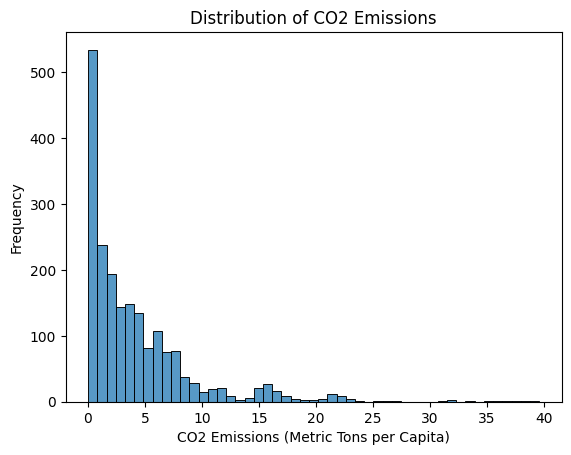

In [6]:
# Histogram of CO2 Emissions
sns.histplot(data_cleaned['CO2 Emissions'])
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (Metric Tons per Capita)')
plt.ylabel('Frequency')
plt.show()

Commentary: The distribution of CO2 emissions indicates significant variability among countries, reflecting different levels of industrialization and environmental policies. The histogram is right-skewed, meaning there is a higher concentration of countries with lower CO2 emissions per capita, and fewer countries have very high emissions. The long tail extending to the right suggests that while fewer in number, there are some countries with significantly higher CO2 emissions per capita. I would like to see which countries are skewing the data in this way, as I can see some outliers in this data.

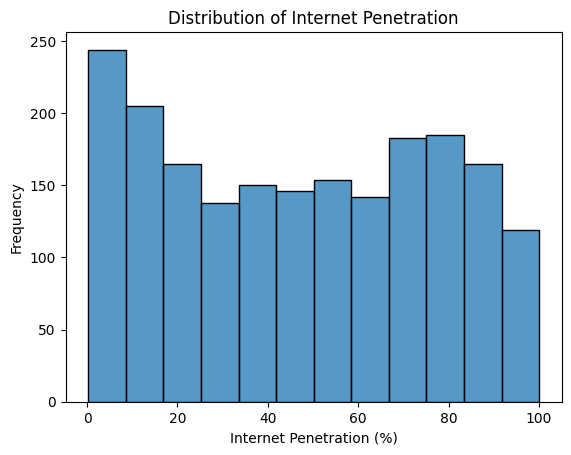

In [7]:
# Histogram of Internet Penetration
sns.histplot(data_cleaned['Internet Penetration'])
plt.title('Distribution of Internet Penetration')
plt.xlabel('Internet Penetration (%)')
plt.ylabel('Frequency')
plt.show()


Commentary: The internet penetration histogram shows a wide range of values, suggesting disparities in digital access across countries. Some countries have very low internet penetration (near 0%), while others have very high penetration (close to 100%). I'd like to see this all on two line graphs, so see if there is a visible relationship between high emmisions and increased internet penetration. 

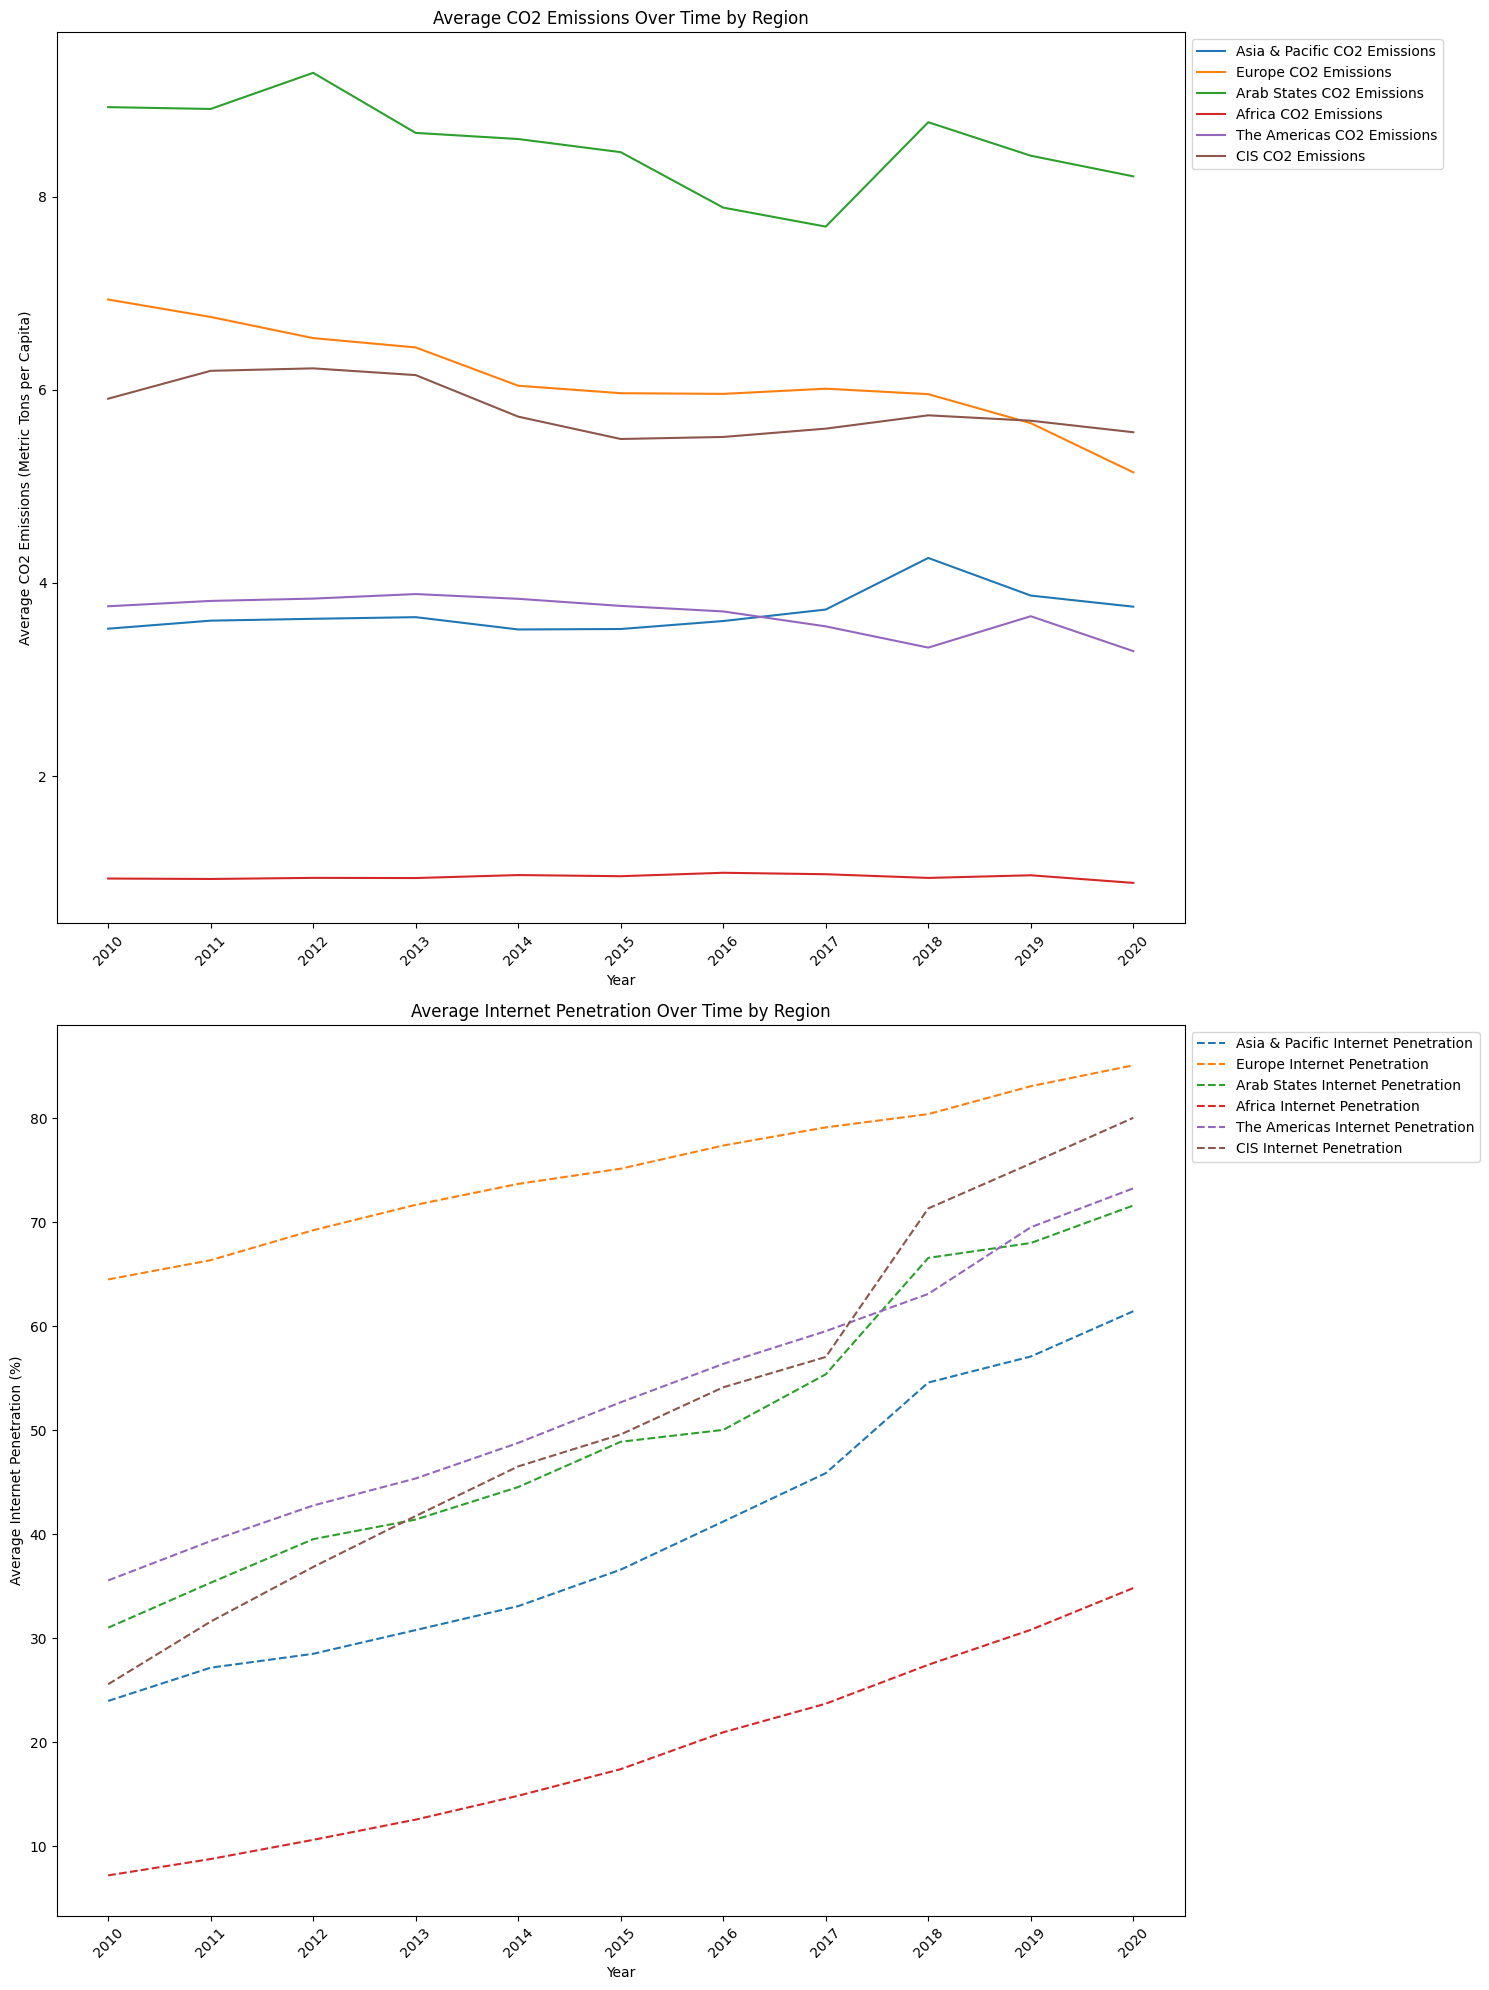

In [8]:
import matplotlib.pyplot as plt

# Assuming 'data_cleaned' has been defined and includes 'Year', 'Region', 'CO2 Emissions', and 'Internet Penetration'

# Get unique regions and years from the data
unique_regions = data_cleaned['Region'].unique()
unique_years = sorted(data_cleaned['Year'].unique())

plt.figure(figsize=(15, 20))

# Plot for CO2 Emissions
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
for region in unique_regions:
    region_data = data_cleaned[data_cleaned['Region'] == region]
    average_emissions = region_data.groupby('Year')['CO2 Emissions'].mean()
    plt.plot(average_emissions.index, average_emissions, label=f"{region} CO2 Emissions", linestyle='-')

plt.title('Average CO2 Emissions Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (Metric Tons per Capita)')
plt.xticks(unique_years, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Plot for Internet Penetration
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
for region in unique_regions:
    region_data = data_cleaned[data_cleaned['Region'] == region]
    average_internet = region_data.groupby('Year')['Internet Penetration'].mean()
    plt.plot(average_internet.index, average_internet, label=f"{region} Internet Penetration", linestyle='--')

plt.title('Average Internet Penetration Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Internet Penetration (%)')
plt.xticks(unique_years, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


Commentary: The graphs reveal that regions with higher internet penetration do not uniformly have higher CO2 emissions, suggesting other factors influence emissions levels. All regions show increasing internet access over time, but CO2 emissions vary, indicating a complex relationship between digital growth and environmental impact. I need to try a correlation analysis to see if there is a relationship.

In [9]:
# Correlation analysis
correlation = data_cleaned[['Internet Penetration', 'CO2 Emissions']].corr()
print(correlation)


                      Internet Penetration  CO2 Emissions
Internet Penetration              1.000000       0.616119
CO2 Emissions                     0.616119       1.000000


Commentary: This is interesting. A moderate to strong positive correlation of 62% is definitely observed, indicating that higher internet penetration often coincides with higher CO2 emissions. I'd like to see the CO2 emissions in a heatmap to see which Countries are skewing the data. perhaps if I remove them I'll see a more representative correlation number?

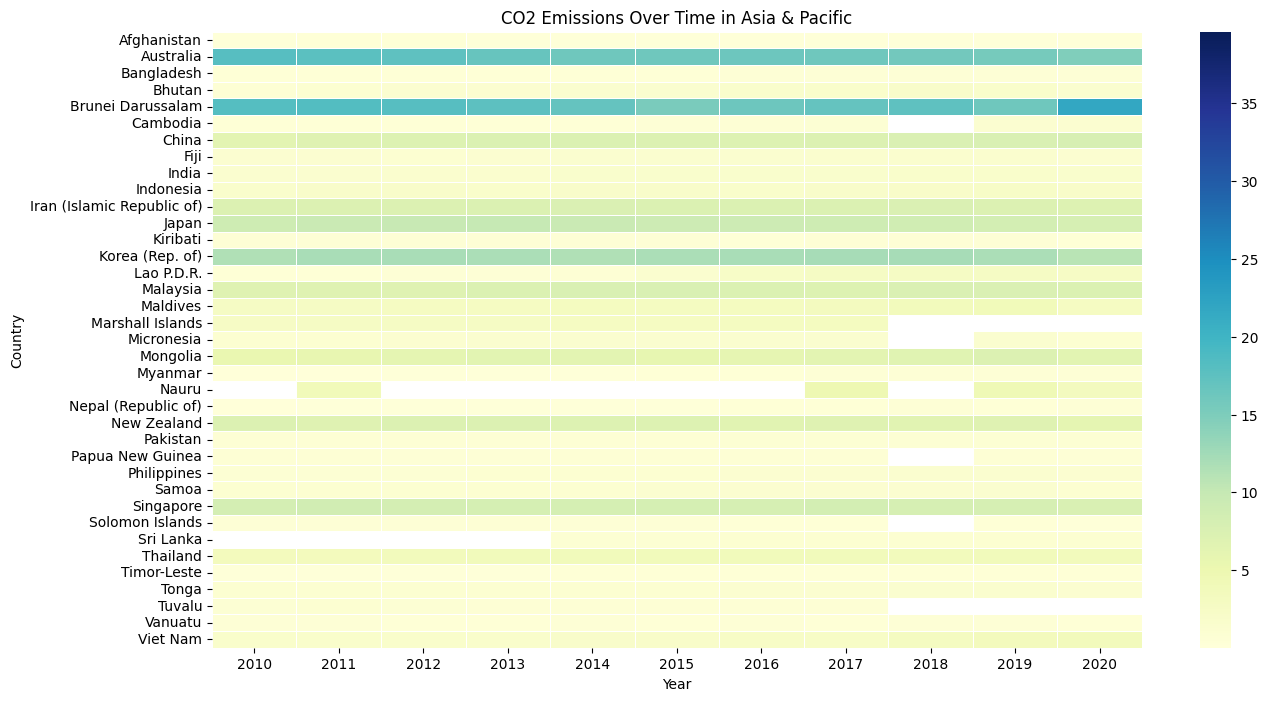

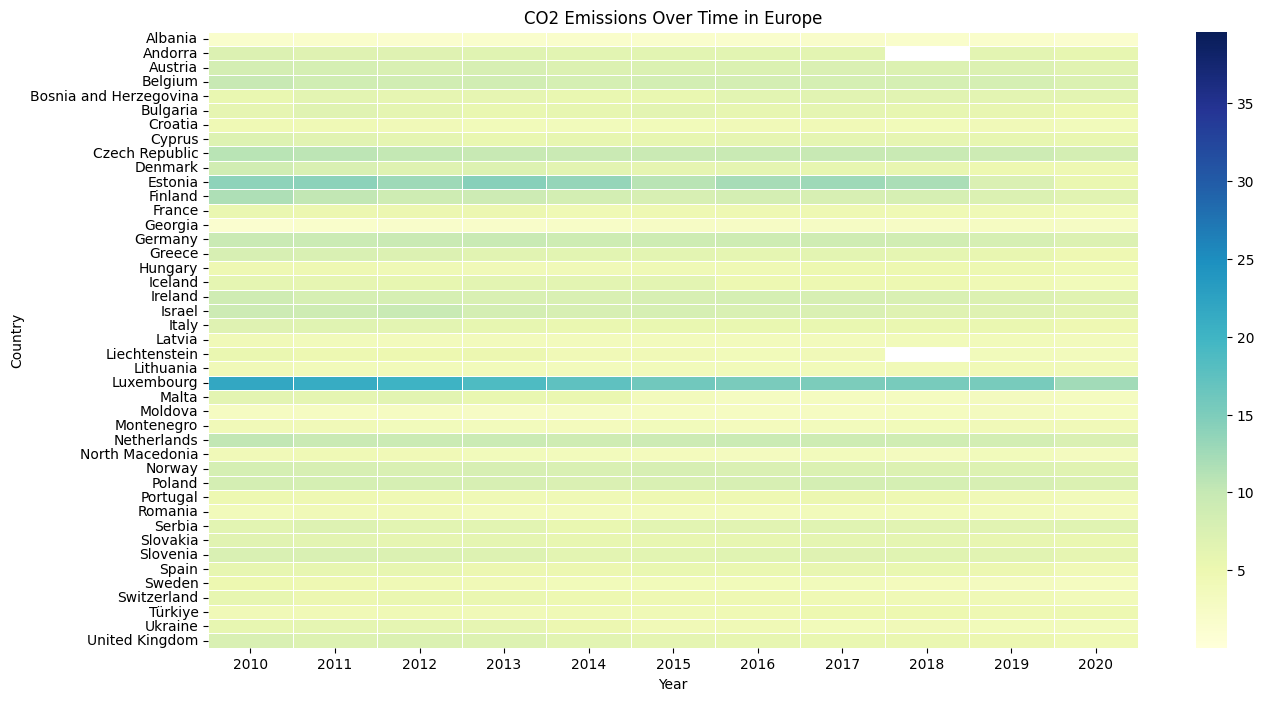

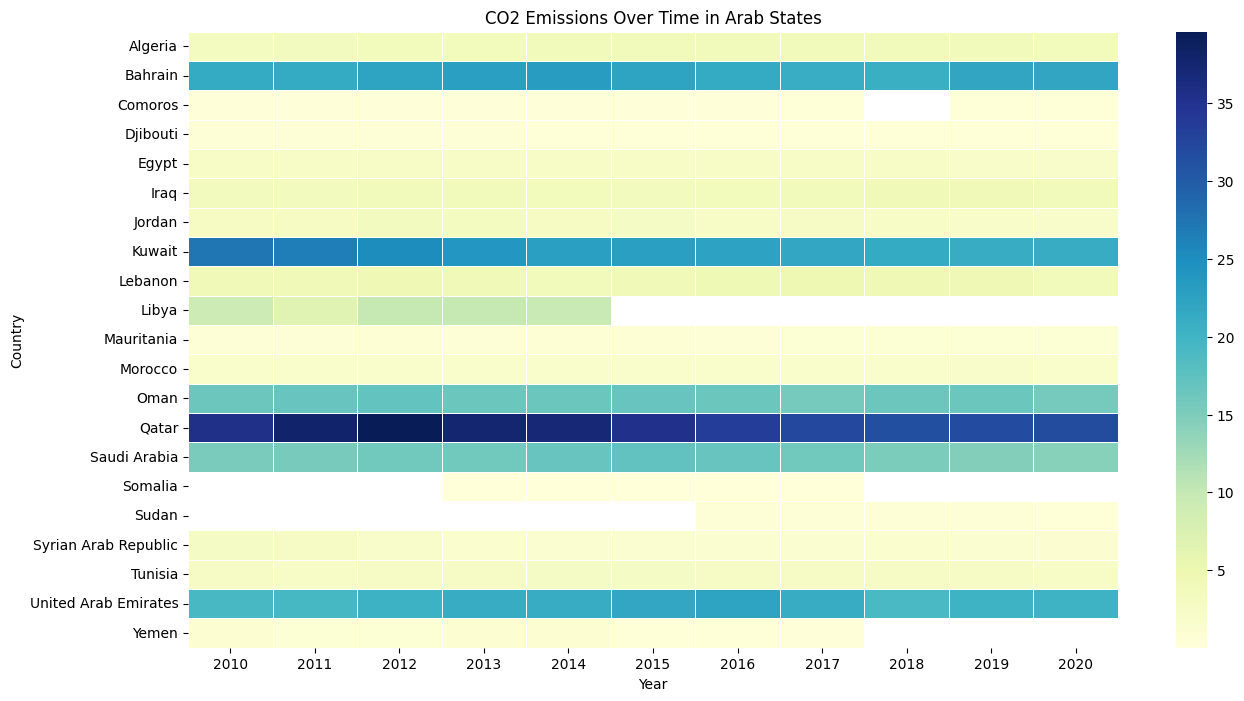

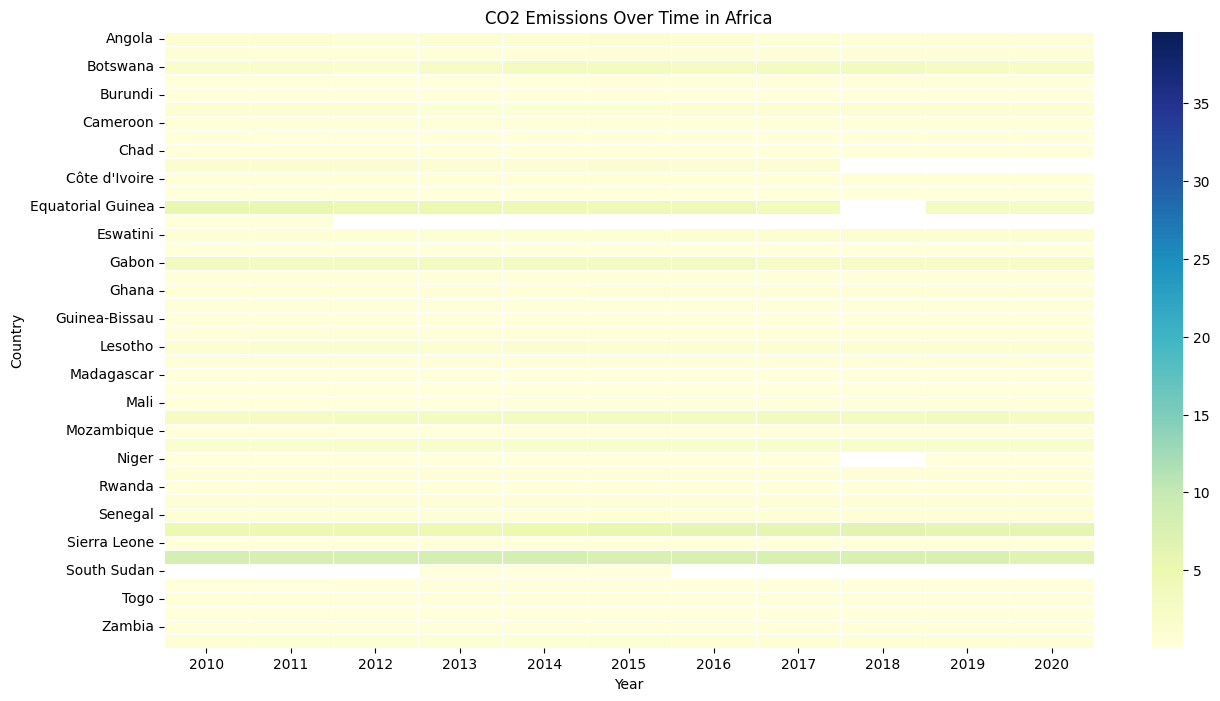

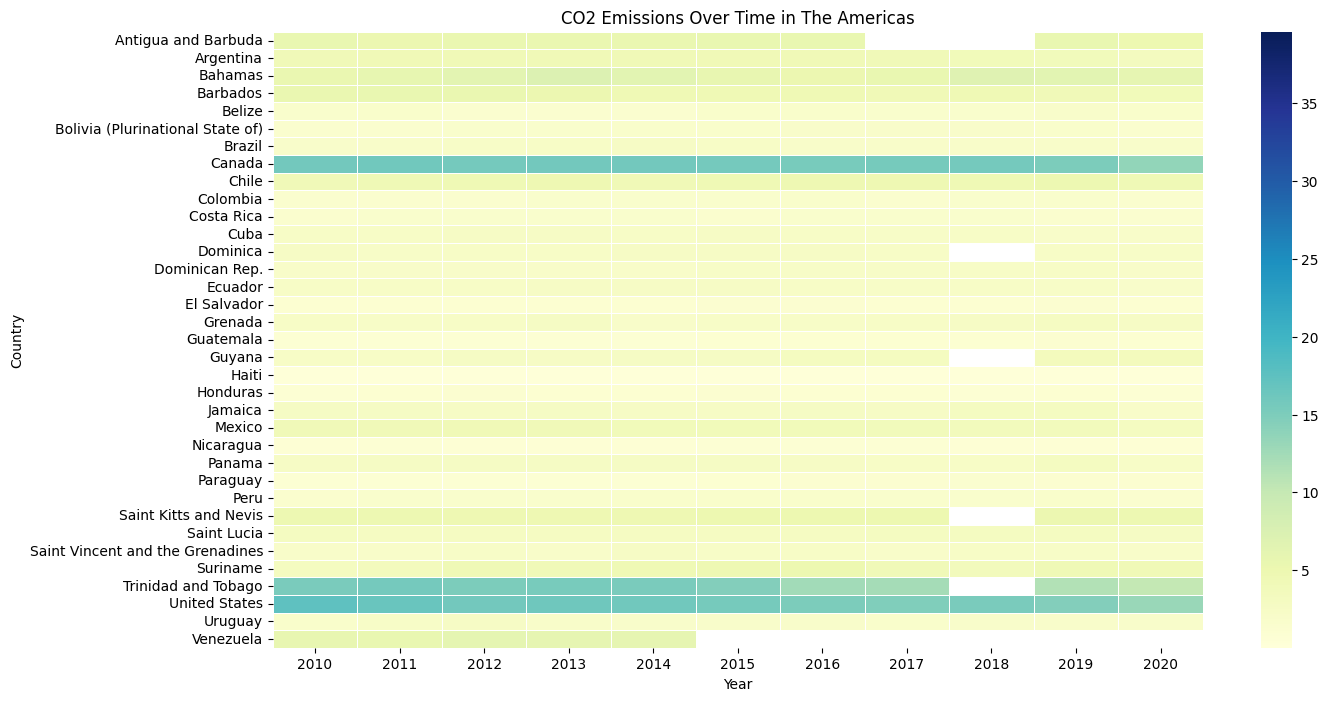

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique regions from the data
unique_regions = data_cleaned['Region'].unique()

# Finding the global minimum and maximum of CO2 emissions for a consistent scale
min_co2 = data_cleaned['CO2 Emissions'].min()
max_co2 = data_cleaned['CO2 Emissions'].max()

# Creating a heatmap for each region
for region in unique_regions:
    # Filter the data for the current region
    region_data = data_cleaned[data_cleaned['Region'] == region]

    # Pivot the data for the heatmap
    heatmap_data = region_data.pivot_table(index='Country', columns='Year', values='CO2 Emissions')

    # Plot heatmap with a consistent scale across all regions
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=False, vmin=min_co2, vmax=max_co2)
    plt.title(f'CO2 Emissions Over Time in {region}')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.show()



Commentary: Outliers are apparent in specific regions (UAE and Africa). Various datasets unavilable in 2018 and since 2018 in some cases. Covid could be a factor? Certain small countries have low emissions overall but relatively high emissions per citizen. My next step is to produce a correlation analysis to see how strong the relationship is between CO2 and Internet Penetration is.

In [ ]:
# Correlation analysis
correlation = data_cleaned[['Internet Penetration', 'CO2 Emissions']].corr()
print(correlation)

# Scatter plot
sns.scatterplot(x='Internet Penetration', y='CO2 Emissions', data=data_cleaned)
plt.title('Internet Penetration vs CO2 Emissions')
plt.xlabel('Internet Penetration (%)')
plt.ylabel('CO2 Emissions (Metric Tons per Capita)')
plt.show()




Commentary: A moderate to strong positive correlation is observed, indicating that higher internet penetration often coincides with higher CO2 emissions. The next step is to split the analysis into regions to determine how much variation there is.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_cleaned' has 'Region' as one of the columns
unique_regions = data_cleaned['Region'].unique()
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns of subplots

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define the same range for x and y axes based on the overall data
x_range = (data_cleaned['Internet Penetration'].min(), data_cleaned['Internet Penetration'].max())
y_range = (data_cleaned['CO2 Emissions'].min(), data_cleaned['CO2 Emissions'].max())

# Loop through the regions and create a scatter plot for each
for i, region in enumerate(unique_regions):
    # Filter the data for the current region
    region_data = data_cleaned[data_cleaned['Region'] == region]
    
    # Perform correlation analysis for the region
    correlation = region_data[['Internet Penetration', 'CO2 Emissions']].corr().iloc[0, 1]

    # Create scatter plot
    sns.scatterplot(ax=axes[i], x='Internet Penetration', y='CO2 Emissions', data=region_data)
    
    # Set title with correlation
    axes[i].set_title(f'{region} (Correlation: {correlation:.2f})')
    
    # Set the same x and y limits for all plots
    axes[i].set_xlim(x_range)
    axes[i].set_ylim(y_range)
    
    # Set x and y labels
    axes[i].set_xlabel('Internet Penetration (%)')
    axes[i].set_ylabel('CO2 Emissions (Metric Tons per Capita)')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


Commentary: Asia & Pacific (Correlation: 0.74): This region shows a high positive correlation between internet penetration and CO2 emissions, suggesting that as internet access increases, CO2 emissions also tend to be higher in this region.

Europe (Correlation: 0.37): Europe shows a lower positive correlation compared to Asia & Pacific, indicating a weaker association between the two variables in this region.

Arab States (Correlation: 0.71): The Arab States also show a high positive correlation, similar to Asia & Pacific, which suggests a strong relationship between increasing internet usage and CO2 emissions.

Africa (Correlation: 0.63): Africa's correlation is moderately positive, indicating a notable but less strong relationship compared to Asia & Pacific or the Arab States.

The Americas (Correlation: 0.53): This region shows a moderate positive correlation, suggesting that there's a relationship between internet penetration and CO2 emissions, but it's not as strong as in some other regions.

CIS (Correlation: 0.21): The CIS region shows a low positive correlation, suggesting that there is little to no linear relationship between internet penetration and CO2 emissions in these countries.

From these observations, it can be inferred that the strength of the relationship between internet penetration and CO2 emissions varies significantly by region. In some regions, the relationship is strong and could be indicative of factors such as industrialization level, energy consumption patterns, and the environmental impact of increased digital infrastructure. In other regions, the weaker correlation might suggest that other variables play a more significant role in influencing CO2 emissions, or that the internet infrastructure's environmental impact is mitigated by other factors, such as renewable energy usage or a focus on rolling out less emissions-heavy internet infrastructure like mobile internet and satellite internet, as is becoming common in many African countries.

In [ ]:
# Scatter plot with trendline
sns.regplot(x='Internet Penetration', y='CO2 Emissions', data=data_cleaned, line_kws={"color": "red"})
plt.title('Internet Penetration vs CO2 Emissions with Trendline')
plt.xlabel('Internet Penetration (%)')
plt.ylabel('CO2 Emissions (Metric Tons per Capita)')
plt.show()


Commentary: If we consider global emissions and Internet Penetration, the trendline in the scatter plot further supports the overall positive correlation, suggesting a relationship between digital advancement and environmental impact. We must keep in mind that some regions exhibit significantly higher levels of CO2 emissions for comparable levels of internet penetration, indicating that regional factors such as industrial practices, energy sources, and regulatory environments also play a crucial role in this dynamic.

## Conclusion <a name="conclusion"></a>

In conclusion, the comprehensive analysis of the relationship between Internet Penetration and CO2 emissions across various regions has revealed a nuanced picture. While there is a general positive correlation globally, indicating that higher internet penetration tends to coincide with increased CO2 emissions, regional variations are significant.

The subplots for individual regions showed that the strength of this correlation varies, with the Asia & Pacific and Arab States regions displaying a stronger correlation, while Europe and CIS regions exhibited a weaker one.  This suggests that while internet penetration may contribute to higher CO2 emissions, it is not the sole determinant. Factors such as the level of industrialization, reliance on different energy sources, and environmental policies play critical roles in shaping a region's CO2 emission profile. 

The heatmap analysis did not indicate clear outliers to be excluded from the correlation analysis. Instead, it highlighted the broad range of emission levels within regions, suggesting that any analysis of CO2 emissions and internet penetration must account for intra-regional differences.

Furthermore, the inclusion of a trendline in the scatter plot analysis provided a visual affirmation of the positive correlation between internet penetration and CO2 emissions. However, it also emphasized the dispersion of the data points, indicating variability that could be attributed to multiple influencing factors beyond digital connectivity.

The findings underscore the complexity of the relationship between technological advancement and environmental impact. They point to the need for a multifaceted approach in environmental policy-making that considers not only the direct effects of increased internet usage but also the broader socio-economic context that shapes a country's environmental footprint.

